In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
y_train

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64

In [15]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)


X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)
X_train

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458,9.8458
...,...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792,221.7792


In [16]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99  imputation: ', X_train['Age_99'].var())
print('Age Variance after -1  imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1  imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99  imputation:  951.7275570187172
Age Variance after -1  imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 imputation:  47219.20265217623
Fare Variance after -1  imputation:  2378.5676784883503


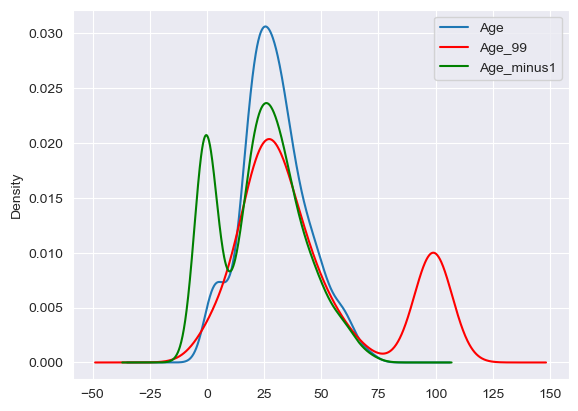

In [18]:
fig = plt.figure()

ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_99'].plot(kind='kde',ax=ax,color="red")

X_train['Age_minus1'].plot(kind='kde',ax=ax,color="green")

lines, label = ax.get_legend_handles_labels()
ax.legend(lines,label)

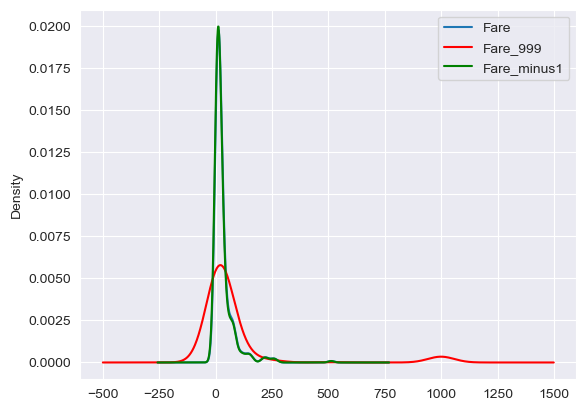

In [22]:
fig = plt.figure()

ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_999'].plot(kind='kde',ax=ax,color="red")

X_train['Fare_minus1'].plot(kind='kde',ax=ax,color="green")

lines, label = ax.get_legend_handles_labels()
ax.legend(lines,label)

In [23]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188,162.793430
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989,11.528625
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400,-159.931663
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141,257.379887
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409,5408.147749
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678,762.474982
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,5408.147749,762.474982,47219.202652


In [24]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585,0.051179
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233,0.032079
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687,-0.023857
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514,0.066411
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648,0.494206
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000,0.071946
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,0.494206,0.071946,1.000000


In [25]:
trf = ColumnTransformer(transformers=[
    ('imp1',SimpleImputer(strategy='constant',fill_value=99),[0]),
    ('imp2',SimpleImputer(strategy='constant',fill_value=999),[1])
],remainder='passthrough')

In [27]:
X_train = trf.fit_transform(X_train)
X_test = trf.fit_transform(X_test)

In [28]:
X_train

array([[ 40.    ,  27.7208,   0.    , ...,  27.7208,  27.7208,  27.7208],
       [  4.    ,  16.7   ,   2.    , ...,  16.7   ,  16.7   ,  16.7   ],
       [ 47.    ,   9.    ,   0.    , ...,   9.    ,   9.    ,   9.    ],
       ...,
       [ 71.    ,  49.5042,   0.    , ...,  49.5042,  49.5042,  49.5042],
       [ 99.    , 221.7792,   0.    , ..., 221.7792, 221.7792, 221.7792],
       [ 99.    ,  25.925 ,   0.    , ...,  25.925 ,  25.925 ,  25.925 ]])